203 105 275 275


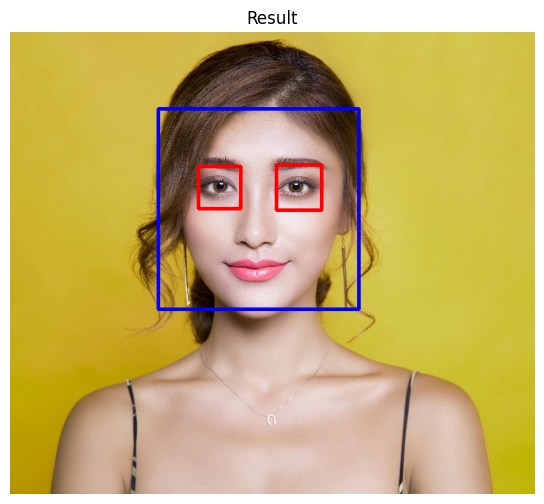

In [3]:
import cv2
from utils import show_images

face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

# Load the cascades
face_cascade.load('./data/haarcascade_frontalface_alt.xml')
eyes_cascade.load('./data/haarcascade_eye_tree_eyeglasses.xml')

img = cv2.imread('./image/face.jpg', -1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.equalizeHist(img_gray)

# 先检测脸部
faces = face_cascade.detectMultiScale(img_gray)
for (x, y, w, h) in faces:
    print(x, y, w, h)
    frame = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 4)

    # 进一步检测眼睛
    faceROI = img_gray[y:y+h,x:x+w]
    eyes = eyes_cascade.detectMultiScale(faceROI)
    for (x2, y2, w2, h2) in eyes:
        x2, y2 = x + x2, y + y2
        frame = cv2.rectangle(img, (x2, y2), (x2+w2, y2+h2), (0, 0, 255), 4)

show_images([
    ('Result', frame)
])